<a href="https://colab.research.google.com/github/mayowaoyaleke/Short_Answer_Grading_System/blob/main/AGS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Definition

#Data Description

#Feature Description

### Preparing Environment

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow_hub as hub
import numpy as np

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch

#import spacy
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm

tqdm.pandas(desc='Progress')
from collections import Counter

from nltk import word_tokenize

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from sklearn.metrics import f1_score
import os 

from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# cross validation and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import shutil
import sys

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.4 MB/s eta 0:00:00


### Importing Data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Automatic Grading System (NLP)/NLP Kaggle DB/Kaggle DB/train.tsv/train.tsv', sep="\t", encoding="ISO-8859-1")
df2 = pd.read_csv('/content/drive/MyDrive/Automatic Grading System (NLP)/NLP Kaggle DB/Kaggle DB/train_rel_2.tsv/train_rel_2.tsv', sep="\t", encoding="ISO-8859-1")


In [7]:
df2.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [8]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


### Exploratory Data Analytics

In [9]:
df.columns

Index(['Id', 'EssaySet', 'Score1', 'Score2', 'EssayText'], dtype='object')

In [10]:
df.describe()

,Id,EssaySet,Score1,Score2
count,17207.000000,17207.000000,17207.000000,17207.000000
mean,13762.276050,5.589411,0.928982,0.927123
std,8239.942484,2.816919,0.893335,0.892600
min,1.000000,1.000000,0.000000,0.000000
25%,6269.500000,3.000000,0.000000,0.000000
50%,14188.000000,6.000000,1.000000,1.000000
75%,20887.500000,8.000000,2.000000,2.000000
max,27588.000000,10.000000,3.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17207 entries, 0 to 17206
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         17207 non-null  int64 
 1   EssaySet   17207 non-null  int64 
 2   Score1     17207 non-null  int64 
 3   Score2     17207 non-null  int64 
 4   EssayText  17207 non-null  object
dtypes: int64(4), object(1)
memory usage: 672.3+ KB


In [12]:
df["EssaySet"]

0         1
1         1
2         1
3         1
4         1
         ..
17202    10
17203    10
17204    10
17205    10
17206    10
Name: EssaySet, Length: 17207, dtype: int64

In [13]:
df_set1 = df[df['EssaySet'] == 1]

In [14]:
df_set1.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [15]:
df_set2 =  df[df["EssaySet"] == 2]

In [16]:
df_set2["EssayText"][1672]

"Changing the type of grafin would improve the student's experiment give a better new at those data. ^P Give the names of each type of plastic type used in this experiment. Each plastic should be the same length. ^P My conclusion is plastic type held up a much stronger than all of the different types."

In [17]:
df_set2["EssayText"][1673]

'Concluding from the students data that plastic type B was the stretchiest, while type A is the least stretchy. Two ways that the students could have improved their experiment is to have described how much height to use. Another way that they could have gotten more valid results is clarify how much plastic to use, hanging of the table.'

In [18]:
df_set2["EssayText"][1674]

"Two ways that the stundent could've improved the experiment is by getting a more better brand of plastic or simply redo the experiment."

Example set 2 is talking about a plastic subject in the science experiment






In [19]:
df_set1["EssayText"][0]

'Some additional information that we would need to replicate the experiment is how much vinegar should be placed in each identical container, how or what tool to use to measure the mass of the four different samples and how much distilled water to use to rinse the four samples after taking them out of the vinegar.'

In [20]:
df_set1["EssayText"][2]

'What you need is more trials, a control set up, and an exact amount of vinegar to pour in each cup/beaker. You could also take and check the mass every 30 min or 1 hour.'

Example set 1 talks about vinegar

In [21]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [22]:
df["Score1"].value_counts()

0    6779
1    5612
2    4075
3     741
Name: Score1, dtype: int64

In [23]:
# Check for null values
df.isnull().sum()

Id           0
EssaySet     0
Score1       0
Score2       0
EssayText    0
dtype: int64

In [24]:
# Check the values of each column
df["Id"].value_counts()

1        1
18260    1
18246    1
18247    1
18248    1
        ..
8970     1
8971     1
8972     1
8973     1
27588    1
Name: Id, Length: 17207, dtype: int64

In [25]:
df["EssaySet"].value_counts()

3     1891
7     1799
8     1799
9     1798
6     1797
5     1795
4     1738
1     1672
10    1640
2     1278
Name: EssaySet, dtype: int64

In [26]:
df["Score1"].value_counts()

0    6779
1    5612
2    4075
3     741
Name: Score1, dtype: int64

In [27]:
df["Score2"].value_counts()

0    6780
1    5648
2    4032
3     747
Name: Score2, dtype: int64

<Axes: >

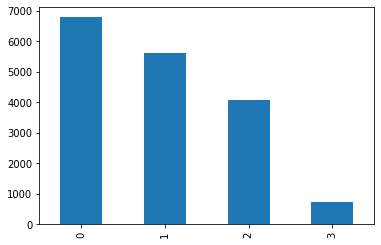

In [28]:
df["Score1"].value_counts().plot(kind = "bar")

<Axes: >

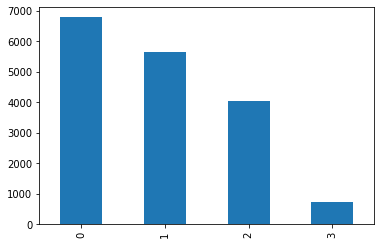

In [29]:
df["Score2"].value_counts().plot(kind = "bar")

### Word and Character Count

In [30]:
# Word Count
df['word_count'] = df['EssayText'].apply(lambda x: len(str(x).split()))
print(df[df['Score2']==3]['word_count'].mean())
print(df[df['Score2']==2]['word_count'].mean()) 
print(df[df['Score2']==1]['word_count'].mean()) 
print(df[df['Score2']==0]['word_count'].mean()) 

62.78848728246319
61.42757936507937
43.04160764872521
28.187905604719763


In [32]:
#2. CHARACTER-COUNT
df['char_count'] = df['EssayText'].apply(lambda x: len(str(x)))
print(df[df['Score2']==3]['char_count'].mean())
print(df[df['Score2']==2]['char_count'].mean()) 
print(df[df['Score2']==1]['char_count'].mean()) 
print(df[df['Score2']==0]['char_count'].mean())

348.7429718875502
340.7016369047619
241.67032577903683
157.58982300884955


In [31]:
 #3. UNIQUE WORD-COUNT
df['unique_word_count'] = df['EssayText'].apply(lambda x: len(set(str(x).split())))
print(df[df['Score2']==3]['unique_word_count'].mean())
print(df[df['Score2']==2]['unique_word_count'].mean()) 
print(df[df['Score2']==1]['unique_word_count'].mean()) 
print(df[df['Score2']==0]['unique_word_count'].mean())

44.33467202141901
44.48065476190476
33.33905807365439
22.340560471976403


In [33]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText,word_count,unique_word_count,char_count
0,1,1,1,1,Some additional information that we would need...,56,41,314
1,2,1,1,1,"After reading the expirement, I realized that ...",48,40,296
2,3,1,1,1,"What you need is more trials, a control set up...",35,34,169
3,4,1,0,0,The student should list what rock is better an...,17,13,88
4,5,1,2,2,For the students to be able to make a replicat...,31,27,158


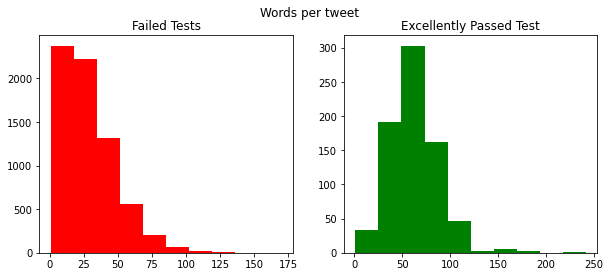

In [34]:
#Plotting word-count per Score
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['Score2']==0]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Failed Tests')
train_words=df[df['Score2']==3]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Excellently Passed Test')
fig.suptitle('Words per tweet')
plt.show()

## Feature Engineering (Pre-Processing)

In [35]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess1(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess1(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [36]:
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

message cleaned may involve things like adjacent spaces tabs


In [37]:
#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

messag clean may involv thing like adjac space tab


In [38]:
#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [39]:
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab


In [40]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess1(string)))

df['clean_text'] = df['EssayText'].apply(lambda x: finalpreprocess(x))

df.head()

,Id,EssaySet,Score1,Score2,EssayText,word_count,unique_word_count,char_count,clean_text
0,1,1,1,1,Some additional information that we would need...,56,41,314,additional information would need replicate ex...
1,2,1,1,1,"After reading the expirement, I realized that ...",48,40,296,read expirement realize additional information...
2,3,1,1,1,"What you need is more trials, a control set up...",35,34,169,need trial control set exact amount vinegar po...
3,4,1,0,0,The student should list what rock is better an...,17,13,88,student list rock well rock bad procedure
4,5,1,2,2,For the students to be able to make a replicat...,31,27,158,student able make replicate would need tell us...


In [42]:
df['word_count'].value_counts()

34     301
33     291
38     289
44     283
46     282
      ... 
177      1
263      1
197      1
227      1
192      1
Name: word_count, Length: 201, dtype: int64

In [ ]:
 df.drop('EssayText', axis = 1, inplace = True)

In [ ]:
df

,Score1,clean_text
0,1,additional information would need replicate ex...
1,1,read expirement realize additional information...
2,1,need trial control set exact amount vinegar po...
3,0,student list rock well rock bad procedure
4,2,student able make replicate would need tell us...
...,...,...
17202,1,white white becuase live hot place dog house l...
17203,1,light gray color affect doghouse b est darker ...
17204,1,light gray think light gray would work best be...
17205,1,dark gray paint doghouse dark gray doghouse wo...


In [ ]:
# df.drop('EssaySet', axis = 1, inplace = True)

In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
embed_size = 200 # how big is each word vector
max_features = 120000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 300 # max number of words in a question to use
batch_size = 512 # how many samples to process at once
n_epochs = 5 # how many times to iterate over all samples
n_splits = 5 # Number of K-fold Splits
SEED = 10
debug = 0

In [ ]:
# from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df['clean_text'], df['Score1'],
                                                    stratify=df['Score1'], 
                                                    test_size=0.15)

In [ ]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts((train_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X =tf.keras.preprocessing.sequence.pad_sequences(train_X, maxlen=maxlen)
test_X = tf.keras.preprocessing.sequence.pad_sequences(test_X, maxlen=maxlen)

In [ ]:
train_X,train_y

(array([[   0,    0,    0, ...,  271, 1017,  129],
        [   0,    0,    0, ..., 1061,  196,  807],
        [   0,    0,    0, ...,  332, 4924,    6],
        ...,
        [   0,    0,    0, ...,    1,  160,   45],
        [   0,    0,    0, ...,   45,  353,  116],
        [   0,    0,    0, ..., 3069,   27,  169]], dtype=int32), 14193    2
 3799     1
 2606     2
 460      3
 8847     0
         ..
 11024    2
 749      3
 16986    2
 15725    0
 8577     0
 Name: Score1, Length: 13765, dtype: int64)

In [ ]:
def load_glove(word_index):
    EMBEDDING_FILE = '/content/drive/MyDrive/Automatic Grading System (NLP)/glove.6B.200d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = -0.005838499,0.48782197
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_index)+1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# missing entries in the embedding are set using np.random.normal so we have to seed here too

if debug:
    embedding_matrix = np.random.randn(120000,300)
else:
    embedding_matrix = load_glove(tokenizer.word_index)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
np.shape(embedding_matrix)

(11769, 200)

In [ ]:
class CNN_Text(nn.Module):
    
    def __init__(self):
        super(CNN_Text, self).__init__()
        filter_sizes = [1,2,3,5]
        num_filters = 36
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs1 = nn.ModuleList([nn.Conv2d(1, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(len(filter_sizes)*num_filters, n_classes)


    def forward(self, x):
        x = self.embedding(x)  
        x = x.unsqueeze(1)  
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x)  
        logit = self.fc1(x) 
        return logit

In [ ]:
n_epochs = 50
model = CNN_Text()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.array, dtype=torch.long).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.array, dtype=torch.long).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),4))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

RuntimeError: ignored

In [ ]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

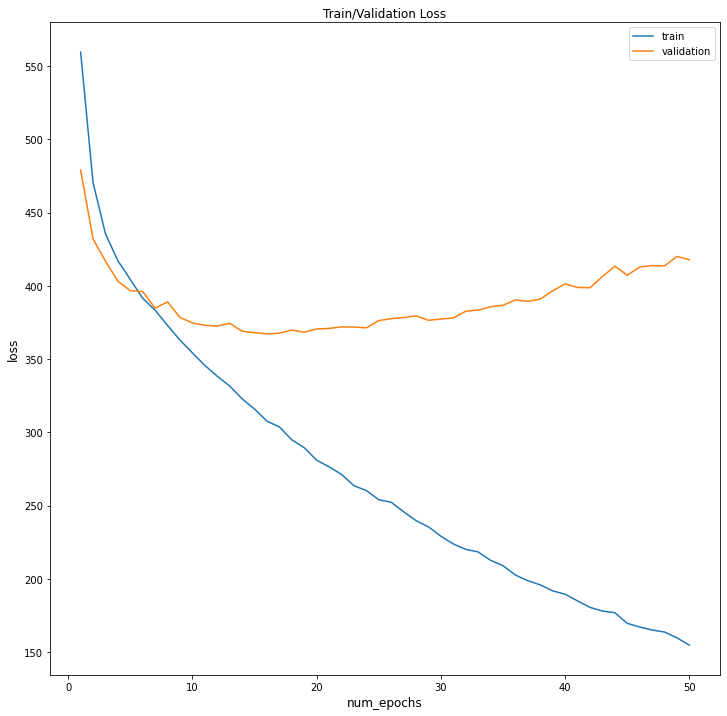

In [ ]:
plot_graph(n_epochs)

In [ ]:
class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.1
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, n_classes)


    def forward(self, x):
        #rint(x.size())
        h_embedding = self.embedding(x)
        #_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out

In [ ]:
n_epochs = 50
model = BiLSTM()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.array, dtype=torch.long).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.array, dtype=torch.long).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),4))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

<ipython-input-34-8b73ba4679a8>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()


Epoch 1/30 	 loss=626.0328 	 val_loss=553.0707  	 val_acc=0.4218  	 time=9.18s
Epoch 2/30 	 loss=544.7296 	 val_loss=494.6502  	 val_acc=0.5567  	 time=8.40s
Epoch 3/30 	 loss=493.2089 	 val_loss=452.6597  	 val_acc=0.5959  	 time=8.43s
Epoch 4/30 	 loss=461.8390 	 val_loss=427.5884  	 val_acc=0.6058  	 time=8.38s
Epoch 5/30 	 loss=441.1648 	 val_loss=417.7156  	 val_acc=0.6209  	 time=8.67s
Epoch 6/30 	 loss=422.3687 	 val_loss=390.1566  	 val_acc=0.6473  	 time=8.40s
Epoch 7/30 	 loss=402.4163 	 val_loss=383.9817  	 val_acc=0.6566  	 time=8.37s
Epoch 8/30 	 loss=381.5539 	 val_loss=368.6552  	 val_acc=0.6636  	 time=8.26s
Epoch 9/30 	 loss=366.6397 	 val_loss=362.9975  	 val_acc=0.6737  	 time=8.34s
Epoch 10/30 	 loss=355.6003 	 val_loss=358.2568  	 val_acc=0.6781  	 time=8.34s
Epoch 11/30 	 loss=339.2322 	 val_loss=360.8527  	 val_acc=0.6752  	 time=8.39s
Epoch 12/30 	 loss=324.8912 	 val_loss=365.1318  	 val_acc=0.6740  	 time=8.40s
Epoch 13/30 	 loss=315.1583 	 val_loss=358.5871  